# Investigation of small separation changes

The script used to generate the data for this can be found in `batch/spirals_vary_tilt/batch.py`.

In [ ]:
import numpy as np
import os
import pickle
import re

prescription = 'prescription_rc_quad'
# Source file location
datapath = '../batch/spirals_vary_tilt/'

reffile = '03.000000-00.000000_prescription_rc_quad'
with open(os.path.join(datapath,reffile), 'rb') as infile:
    ref = pickle.load(infile)

psfs = []
float_pattern = '[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
p = re.compile('(?P<x>{})-(?P<y>{})_{}'.format(float_pattern, float_pattern, prescription))
for fname in os.listdir(datapath):
    m = p.match(fname)
    if m is not None:
        #print(fname)
        dims = m.groupdict()
        psf = {}
        psf['tilt_x'] = float(dims['x'])
        psf['tilt_y'] = float(dims['y'])
        with open(os.path.join(datapath,fname), 'rb') as infile:
            psf['data'] = pickle.load(infile)
        psfs.append(psf)


# RMSE Change in image



In [27]:
import numpy as np

vpmin = 256-64
vpmax = 256+64
refvp = ref[vpmin:vpmax, vpmin:vpmax]
dx = []
errs = []
for psf in psfs:
    dx.append(psf['tilt_x'])
    dif = psf['data'][vpmin:vpmax, vpmin:vpmax] - refvp
    errs.append(np.sum(dif**2))

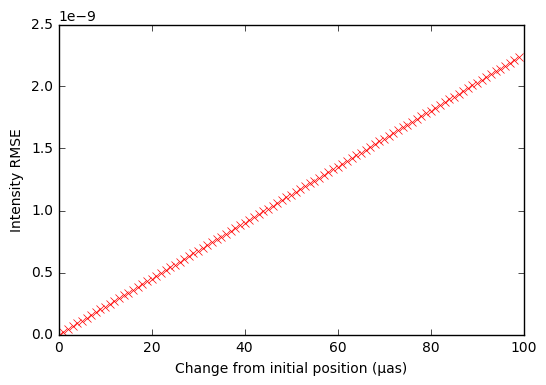

In [48]:
import matplotlib.pyplot as plt
plt.plot([1e6*(x - 3.0) for x in dx],np.sqrt(errs)/(128.*128.), 'rx')
#plt.title('Effect of small separation changes')
plt.xlabel('Change from initial position (µas)')
plt.ylabel('Intensity RMSE')
plt.show()

In [61]:
import numpy as np

lines = []
for psf in psfs:
    lines.append({'dx': psf['tilt_x'] - 3.0, 'data': psf['data'][vpmin:vpmax, 255:256]})
lines.sort(key=lambda tup: tup['dx'])


In [84]:
y = [line['dx'] for line in lines]
x = range(vpmax-vpmin)
X, Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)
for i,line in enumerate(lines):
    for j, z in enumerate(line['data']):
        Z[i,j] =  z


128 100
(100, 128) (100, 128)


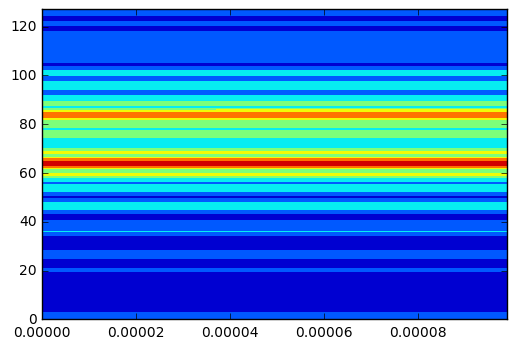

In [86]:
CS = plt.contourf(Y, X, np.log10(Z))#, 10, cmap=plt.cm.bone, origin=origin)
plt.show()